In [17]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn import metrics
import glob
import math
import matplotlib.pyplot as plt
from statistics import mean 

In [2]:
def sMAPE(a, b):
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [3]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [6]:
def average_week(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    df['year'] = pd.DatetimeIndex(df['tstp']).year
    
    #Separate into train and test
    print('Separating into train and test')
    train = df[:33648]
    test = df[33648:34992]
    y_test = test['energy(kWh/hh)'].to_list()
        
    #create columns for the grouping by tstp
    train['day_of_week'] = pd.DatetimeIndex(train['tstp']).dayofweek
    train['hour'] = pd.DatetimeIndex(train['tstp']).hour
    train['minute'] = pd.DatetimeIndex(train['tstp']).minute
        
    #Predict
    print('Predicting')
    # groupby (in our case this is the prediction)
    prediction_hh = train.groupby(['day_of_week','hour','minute']).mean().reset_index()
    del prediction_hh['year']
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred_sem1 = prediction_hh['energy(kWh/hh)']
    y_pred_sem2 = prediction_hh['energy(kWh/hh)']
    y_pred_sem3 = prediction_hh['energy(kWh/hh)']
    y_pred_sem4 = prediction_hh['energy(kWh/hh)']
    frames = [y_pred_sem1,y_pred_sem2,y_pred_sem3,y_pred_sem4]
    y_pred = pd.concat(frames).to_list()
            
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(y_test,y_pred)
    rmsle_i = rmsle(y_test,y_pred)
        
    return mape_i,rmsle_i

In [10]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate' # use your path
all_files = glob.glob(path + "/*.csv")

mape_t = []
rmsle_t = []
i = 0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    mape_i,rmsle_i = average_week(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)
    i = i + 1
    print('household number ' + str(i))


Separating into train and test
Predicting
Calculating metrics
household number 1


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Separating into train and test
Predicting
Calculating metrics
household number 2
Separating into train and test
Predicting
Calculating metrics
household number 3
Separating into train and test
Predicting
Calculating metrics
household number 4
Separating into train and test
Predicting
Calculating metrics
household number 5
Separating into train and test
Predicting
Calculating metrics
household number 6
Separating into train and test
Predicting
Calculating metrics
household number 7
Separating into train and test
Predicting
Calculating metrics
household number 8
Separating into train and test
Predicting
Calculating metrics
household number 9
Separating into train and test
Predicting
Calculating metrics
household number 10
Separating into train and test
Predicting
Calculating metrics
household number 11
Separating into train and test
Predicting
Calculating metrics
household number 12
Separating into train and test
Predicting
Calculating metrics
household number 13
Separating into train an

Predicting
Calculating metrics
household number 102
Separating into train and test
Predicting
Calculating metrics
household number 103
Separating into train and test
Predicting
Calculating metrics
household number 104
Separating into train and test
Predicting
Calculating metrics
household number 105
Separating into train and test
Predicting
Calculating metrics
household number 106
Separating into train and test
Predicting
Calculating metrics
household number 107
Separating into train and test
Predicting
Calculating metrics
household number 108
Separating into train and test
Predicting
Calculating metrics
household number 109
Separating into train and test
Predicting
Calculating metrics
household number 110
Separating into train and test
Predicting
Calculating metrics
household number 111
Separating into train and test
Predicting
Calculating metrics
household number 112
Separating into train and test
Predicting
Calculating metrics
household number 113
Separating into train and test
Pred

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Separating into train and test
Predicting
Calculating metrics
household number 166
Separating into train and test
Predicting
Calculating metrics
household number 167
Separating into train and test
Predicting
Calculating metrics
household number 168
Separating into train and test
Predicting
Calculating metrics
household number 169
Separating into train and test
Predicting
Calculating metrics
household number 170
Separating into train and test
Predicting
Calculating metrics
household number 171
Separating into train and test
Predicting
Calculating metrics
household number 172
Separating into train and test
Predicting
Calculating metrics
household number 173
Separating into train and test
Predicting
Calculating metrics
household number 174
Separating into train and test
Predicting
Calculating metrics
household number 175
Separating into train and test
Predicting
Calculating metrics
household number 176
Separating into train and test
Predicting
Calculating metrics
household number 177
Sepa

Separating into train and test
Predicting
Calculating metrics
household number 265
Separating into train and test
Predicting
Calculating metrics
household number 266
Separating into train and test
Predicting
Calculating metrics
household number 267
Separating into train and test
Predicting
Calculating metrics
household number 268
Separating into train and test
Predicting
Calculating metrics
household number 269
Separating into train and test
Predicting
Calculating metrics
household number 270
Separating into train and test
Predicting
Calculating metrics
household number 271
Separating into train and test
Predicting
Calculating metrics
household number 272
Separating into train and test
Predicting
Calculating metrics
household number 273
Separating into train and test
Predicting
Calculating metrics
household number 274
Separating into train and test
Predicting
Calculating metrics
household number 275
Separating into train and test
Predicting
Calculating metrics
household number 276
Sepa

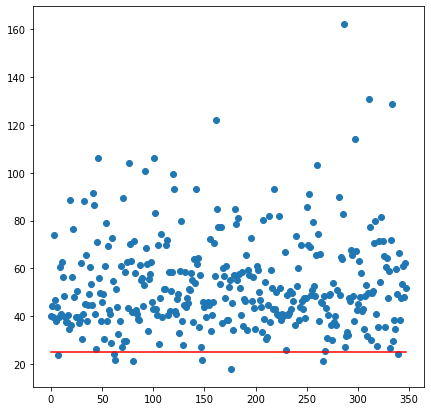

In [26]:
plt.figure(figsize = (7,7))
plt.scatter(range(348),mape_t)
plt.plot(range(348),[25]*348,color = 'red')
plt.show()

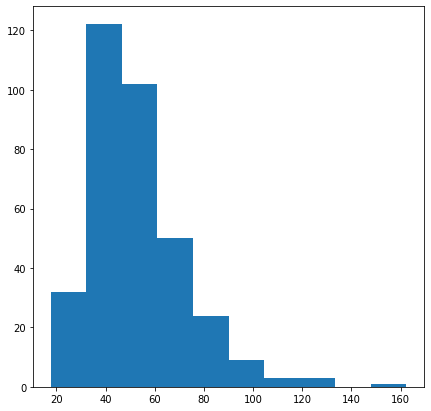

In [31]:
plt.figure(figsize = (7,7))
plt.hist(mape_t)
plt.show()

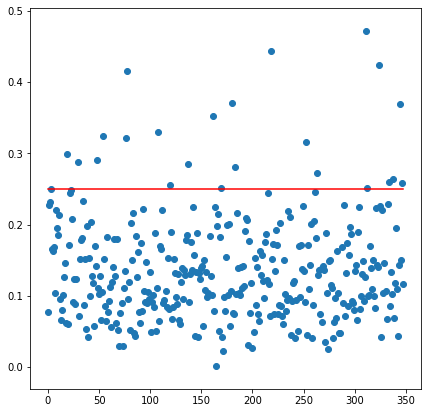

In [25]:
plt.figure(figsize = (7,7))
plt.scatter(range(348),rmsle_t)
plt.plot(range(348),[0.25]*348,color = 'red')
plt.show()

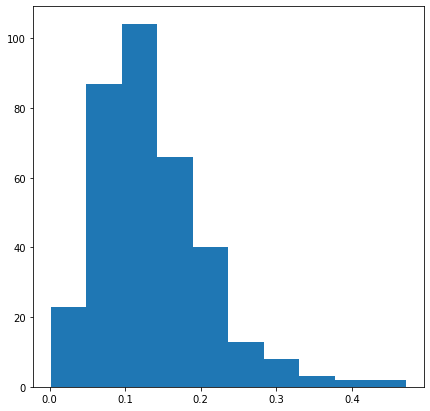

In [32]:
plt.figure(figsize = (7,7))
plt.hist(rmsle_t)
plt.show()